In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn
import impyute

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Imesh Ekanayake\.conda\envs\

In [3]:
#INPUT DATA
data =pd.read_csv('credit_card_default_train.csv') 
Test_data = pd.read_csv('credit_card_default_test.csv') 

In [4]:

data["Gender"]=data["Gender"].replace('M',1,regex=True) #Male = 1
data["Gender"]=data["Gender"].replace('F',0,regex=True) #Female =0


data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
data["MARITAL_STATUS"]=data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
data["EDUCATION_STATUS"]=data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


data["AGE"]=data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('31-45',2,regex=True) #Female =0
data["AGE"]=data["AGE"].replace('46-65',3,regex=True) #Male = 1
data["AGE"]=data["AGE"].replace('More than 65',4,regex=True) #Female =0

data['Gender']= data['Gender'].apply(pd.to_numeric)
data['MARITAL_STATUS']= data['MARITAL_STATUS'].apply(pd.to_numeric)
data['EDUCATION_STATUS']= data['EDUCATION_STATUS'].apply(pd.to_numeric)
data['AGE']= data['AGE'].apply(pd.to_numeric)


for  i  in range(data["Balance_Limit_V1"].count()):
    if  type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'M' :
       
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(data["Balance_Limit_V1"][i])==str and data["Balance_Limit_V1"][i][-1] == 'K' :
        data["Balance_Limit_V1"][i] = int(float(data["Balance_Limit_V1"][i][:-1]))
        
data['Balance_Limit_V1']= data['Balance_Limit_V1'].apply(pd.to_numeric)

Data=data
Data.dtypes

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Client_ID             object
Balance_Limit_V1       int64
Gender                 int64
EDUCATION_STATUS       int64
MARITAL_STATUS         int64
AGE                    int64
PAY_JULY               int64
PAY_AUG                int64
PAY_SEP                int64
PAY_OCT                int64
PAY_NOV                int64
PAY_DEC                int64
DUE_AMT_JULY           int64
DUE_AMT_AUG            int64
DUE_AMT_SEP            int64
DUE_AMT_OCT            int64
DUE_AMT_NOV            int64
DUE_AMT_DEC            int64
PAID_AMT_JULY          int64
PAID_AMT_AUG           int64
PAID_AMT_SEP           int64
PAID_AMT_OCT           int64
PAID_AMT_NOV           int64
PAID_AMT_DEC           int64
NEXT_MONTH_DEFAULT     int64
dtype: object

In [5]:

Test_data["Gender"]=Test_data["Gender"].replace('M',1,regex=True) #Male = 1
Test_data["Gender"]=Test_data["Gender"].replace('F',0,regex=True) #Female =0


Test_data["Balance_Limit_V1"]=Test_data["Balance_Limit_V1"].replace('M','000000',regex=True) #M = 000000
Test_data["Balance_Limit_V1"]=Test_data["Balance_Limit_V1"].replace('K','000',regex=True)    #K = 000


Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["MARITAL_STATUS"]=Test_data["MARITAL_STATUS"].replace('Single',0,regex=True) #Female =0


Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Other',1,regex=True) #Male = 1
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('High School',2,regex=True) #Female =0
Test_data["EDUCATION_STATUS"]=Test_data["EDUCATION_STATUS"].replace('Graduate',3,regex=True) #Female =0


Test_data["AGE"]=Test_data["AGE"].replace('Less than 30',1,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('31-45',2,regex=True) #Female =0
Test_data["AGE"]=Test_data["AGE"].replace('46-65',3,regex=True) #Male = 1
Test_data["AGE"]=Test_data["AGE"].replace('More than 65',4,regex=True) #Female =0

Test_data['Gender']= Test_data['Gender'].apply(pd.to_numeric)
Test_data['MARITAL_STATUS']= Test_data['MARITAL_STATUS'].apply(pd.to_numeric)
Test_data['EDUCATION_STATUS']= Test_data['EDUCATION_STATUS'].apply(pd.to_numeric)
Test_data['AGE']= Test_data['AGE'].apply(pd.to_numeric)

for  i  in range(Test_data["Balance_Limit_V1"].count()):
    if  type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'M' :
       
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1])*1000)
    elif type(Test_data["Balance_Limit_V1"][i])==str and Test_data["Balance_Limit_V1"][i][-1] == 'K' :
        Test_data["Balance_Limit_V1"][i] = int(float(Test_data["Balance_Limit_V1"][i][:-1]))
        
Test_data['Balance_Limit_V1']= Test_data['Balance_Limit_V1'].apply(pd.to_numeric)

Test_Data=Test_data
Test_Data.dtypes

Client_ID            object
Balance_Limit_V1    float64
Gender                int64
EDUCATION_STATUS      int64
MARITAL_STATUS        int64
AGE                   int64
PAY_JULY              int64
PAY_AUG               int64
PAY_SEP               int64
PAY_OCT               int64
PAY_NOV               int64
PAY_DEC               int64
DUE_AMT_JULY          int64
DUE_AMT_AUG           int64
DUE_AMT_SEP           int64
DUE_AMT_OCT           int64
DUE_AMT_NOV           int64
DUE_AMT_DEC           int64
PAID_AMT_JULY         int64
PAID_AMT_AUG          int64
PAID_AMT_SEP          int64
PAID_AMT_OCT          int64
PAID_AMT_NOV          int64
PAID_AMT_DEC          int64
dtype: object

In [6]:
Test_Data.columns

Index(['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
z=[]


df_mix = Data.append(Test_Data) 


highCo=[ 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS',
       'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT',
       'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP',
       'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY',
       'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV',
       'PAID_AMT_DEC']
len(highCo)

subData = df_mix.loc[:,highCo]



# scaler = StandardScaler( with_mean=True, with_std=True)

# subData.describe()

Std_Data=(subData-subData.mean())/subData.std()



from sklearn.decomposition import PCA
pca=PCA(n_components=6, copy=True, whiten=False, svd_solver='auto', tol=0.1, 
                          iterated_power='auto')

principalComponents = pca.fit_transform(Std_Data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6'])



Std_data_Train=principalDf.head(24000)
Std_Data_Train = Std_data_Train.join(Data["NEXT_MONTH_DEFAULT"])

Std_Data_Test=principalDf.tail(6000)

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['NEXT_MONTH_DEFAULT']))
print(sum(cls))


1.5850841335528711


C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [8]:
Std_Data_Train

,PC1,PC2,PC3,PC4,PC5,NEXT_MONTH_DEFAULT
0,-0.679041,3.391571,5.324923,1.018132,-0.087057,0
1,0.356381,1.944956,2.735580,-0.595918,-0.663582,0
2,-0.123392,-3.200577,-0.442136,1.159789,-1.226755,1
3,0.319404,-0.963032,-0.400808,0.692712,-1.660275,1
4,5.346930,0.874101,-0.957316,-1.213666,-1.898594,0
...,...,...,...,...,...,...
23995,2.442956,0.839342,-0.953688,0.573823,-0.910341,0
23996,-1.813624,-0.016364,0.323235,-0.342710,-1.201941,0
23997,0.544254,-3.201204,0.674797,0.270666,-0.827139,1
23998,0.626935,1.096179,2.130001,1.724698,-0.793140,1


In [9]:
Std_Data_Test

,PC1,PC2,PC3,PC4,PC5
24000,2.851879,1.791722,1.066781,1.378997,1.307344
24001,0.054969,-0.596511,-0.677939,1.068100,-0.492929
24002,-1.295986,-0.905841,0.651830,-1.082680,1.216778
24003,-2.664959,1.014246,-0.835672,0.319073,0.078128
24004,-2.639685,0.998861,-0.385515,-1.626634,-1.011447
...,...,...,...,...,...
29995,5.497035,2.728846,-1.416045,-1.381445,0.361863
29996,-2.573197,0.880074,-0.615276,0.529227,-1.540643
29997,0.182123,-0.374836,-0.718954,0.875784,1.200861
29998,-0.927927,-0.774204,-0.461279,1.788598,0.457455


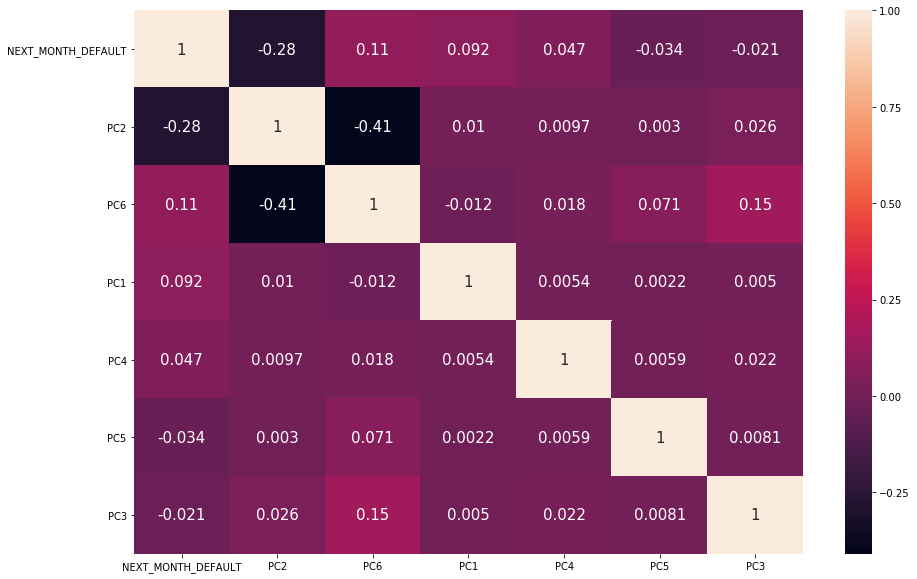

In [13]:
from pandas import DataFrame
import seaborn as sn

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['NEXT_MONTH_DEFAULT']))
p=cls.sort_values(ascending=False)

t=p.index

df = DataFrame(Std_Data_Train[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 15},ax=ax)

In [45]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3, copy=True, whiten=False, svd_solver='auto', tol=0.1, 
                          iterated_power='auto', random_state=7)

principalComponents = pca.fit_transform(Std_Data_Train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3'])


principalDf = principalDf.join(Data["NEXT_MONTH_DEFAULT"])


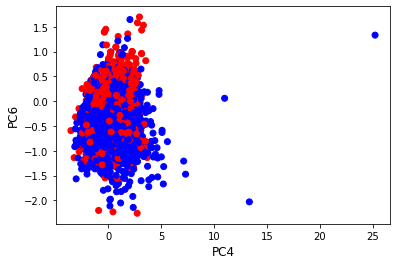

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X="PC4"
Y="PC6"

fig, ax = plt.subplots()

ax.scatter(np.array(Std_Data_Train[X]), np.array(Std_Data_Train[Y]), c=np.array(Std_Data_Train["NEXT_MONTH_DEFAULT"]), cmap="bwr")
ax.set_xlabel(X,fontsize=12);
ax.set_ylabel(Y,fontsize=12);
plt.show()

In [47]:
# Training model

def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=54)
    tree.fit(X_train,Y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100,criterion="entropy")
    forest.fit(X_train,Y_train)
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(learning_rate=0.001)
    modelx.fit(X_train,Y_train)
    
    #Use ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ExtraTree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=6)
    ExtraTree.fit(X_train,Y_train)
    
    #use AdaBoostClassifier
    from sklearn.ensemble import AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=100)
    AdaBoost.fit(X_train,Y_train)
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
    print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
    print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
    print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy: ",ExtraTree.score(X_train,Y_train))
    print("[9] AdaBoostClassifierr Training Accuracy: ",AdaBoost.score(X_train,Y_train))
    
    
    return  log,knn, svc_lin, svc_rbf, gauss, tree, forest,modelx,ExtraTree,AdaBoost

In [40]:
p=['PC1', 'PC2','PC3']

subdata = Std_Data_Train.loc[:,p+["NEXT_MONTH_DEFAULT"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["NEXT_MONTH_DEFAULT"]]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['PC1', 'PC2', 'PC3'] 
size = 24000


[0] Logistic Regression Training Accuracy:  0.7954761904761904
[1] K Neighbors Regression Training Accuracy:  0.8351785714285714
[2] SVC Linear Training Accuracy:  0.778154761904762
[3] SVC RBF Training Accuracy:  0.8051190476190476
[4] Gaussian NB Training Accuracy:  0.7975
[5] Decision Tree Training Accuracy:  0.9952380952380953
[6] Random Forest Training Accuracy:  0.9950595238095238
[7] XGBClassifier Training Accuracy:  0.8023214285714285
[8] ExtraTreesClassifier Training Accuracy:  0.9104166666666667
[9] AdaBoostClassifierr Training Accuracy:  0.8024404761904762


Logistic Regression Testing Accuracy =  0.7933333333333333 

	TP: 217 	FP: 102 
	TN: 5495 	FN: 1386



K Neighbors Testing Accuracy =  0.78 

	TP: 528 	FP: 509 
	TN: 5088 	FN: 1075



SVC Linear Testing Accuracy =  0.7773611111111111 

	TP: 0 	FP: 0 
	TN: 5597 	FN: 1603



SVC RBF Testing Accuracy =  0.8036111111111112 

	TP: 446 	FP: 257 
	TN: 5340 	FN: 1157



Gau